In [1]:
import os
import sys
import pandas as pd
import numpy as np
module_path = os.path.abspath(os.path.join('../../data/..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
%matplotlib inline

In [2]:
ZIPdf = pd.read_pickle('../../data/analysis/ZIPprofiles.pkl')

In [3]:
ZIPdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1461 entries, 02224 to nan
Data columns (total 12 columns):
num_businesses       1461 non-null int64
num_open             1461 non-null int64
%closed              1461 non-null float64
num_reviews          1461 non-null float64
num_checkins         1461 non-null float64
num_tips             1461 non-null float64
open_stars           1426 non-null float64
closed_stars         919 non-null float64
std.dev_stars        1166 non-null float64
open_categories      1461 non-null object
closed_categories    1461 non-null object
chains               1461 non-null object
dtypes: float64(7), int64(2), object(3)
memory usage: 148.4+ KB


## Overview of ZIP Profiles
<p>Below is the distribution of average star ratings of open businesses in the various ZIP code areas.</p>

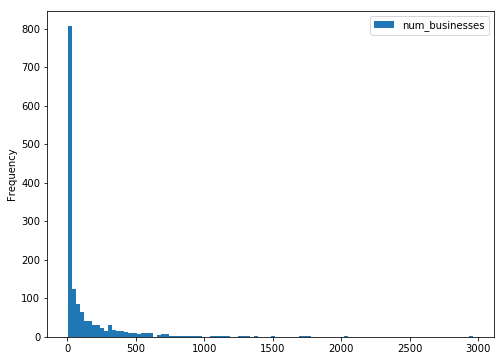

In [48]:
ZIPdf.plot(kind = 'hist', y = 'num_businesses', bins = 100, figsize = (8,6))

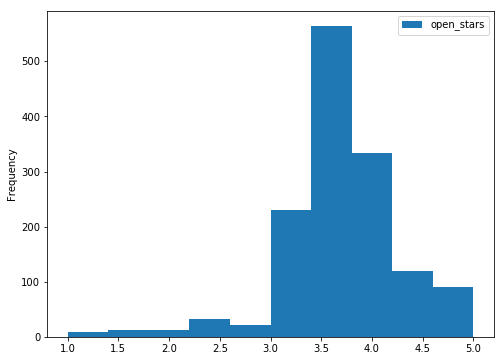

In [4]:
ZIPdf.plot(kind = 'hist', y = 'open_stars', bins = 10, figsize = (8,6))

<p>Here is the distribution of the standard deviation of star ratings in each area.</p>
<p>We can see that the standard deviation of ratings for most places is roughly one star</p>

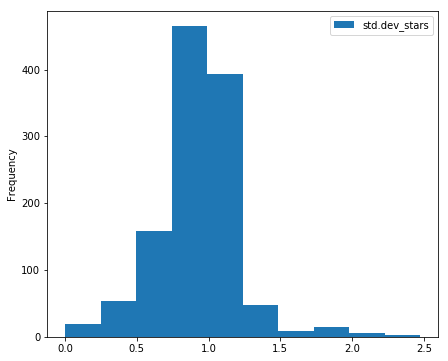

In [5]:
ZIPdf.plot(kind = 'hist', y = 'std.dev_stars', bins = 10, figsize = (7,6))

<p>Below we have plotted the number of businesses in an area against their standard deviation in rating.</p>
<p>We can see that as areas have higher numbers of businesses they trend towards the average standard deviation</p>

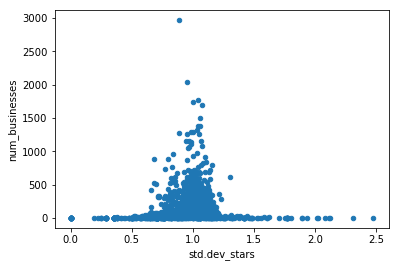

In [14]:
ZIPdf.plot(kind = 'scatter', x ='std.dev_stars',y = 'num_businesses')

Now let's look at the distribution of closure rates by area.

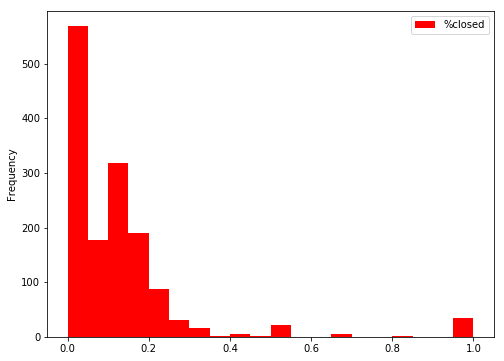

In [16]:
ZIPdf.plot(kind = 'hist', y = '%closed', figsize = (8,6), color = 'red', bins = 20)

In [17]:
def countChains(chainDict):
    count = 0
    if not chainDict:
        return count
    for chain in chainDict:
        count += chainDict[chain]
        
    return count

In [18]:
ZIPdf['num_chains'] = ZIPdf['chains'].apply(countChains)

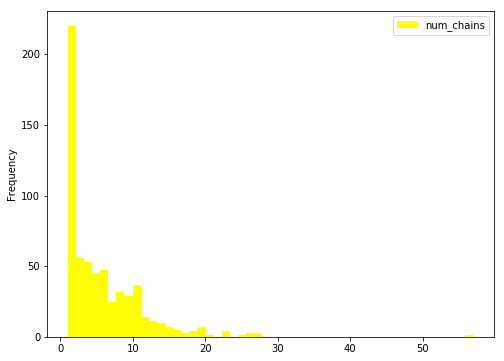

In [31]:
ZIPdf[ZIPdf['num_chains'] > 0].plot(kind = 'hist', y = 'num_chains', figsize = (8,6), color = 'yellow', bins = 50)

## Are ratings clustered?

Below we see the distribution of standard deviation in rating. The majority of areas have a standard deviation from 0.5 and 1.25 stars, which could suggest a level of clustering.

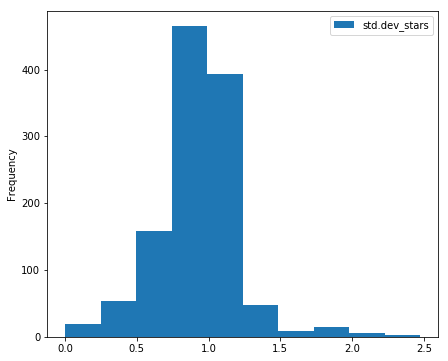

In [32]:
ZIPdf.plot(kind = 'hist', y = 'std.dev_stars', bins = 10, figsize = (7,6))

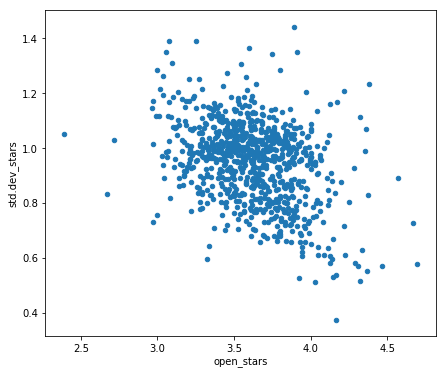

In [55]:
ZIPdf[ZIPdf['num_businesses'] > 10].plot(kind = 'scatter',x = 'open_stars', y = 'std.dev_stars',  figsize = (7,6),)


## Are Closures linked to competition?

## Effect of chain franchises